                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     69.33
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           5.07e-13
Time:                        13:45:28   Log-Likelihood:                -203.42
No. Observations:                 100   AIC:                             410.8
Df Residuals:                      98   BIC:                             416.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9966      0.371      2.686      0.0

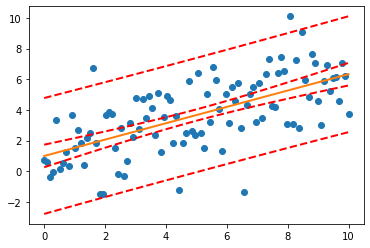

In [5]:
import re
from statsmodels.stats.outliers_influence import summary_table
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

n = 100

x = np.linspace(0, 10, n)
e = np.random.normal(size=n)
y = 1 + 0.5*x + 2*e
X = sm.add_constant(x)

re = sm.OLS(y, X).fit()
print(re.summary())

prstd, iv_l, iv_u = wls_prediction_std(re)

st, data, ss2 = summary_table(re, alpha=0.05)


fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T

# Check we got the right things
print(np.max(np.abs(re.fittedvalues - fittedvalues)))
print(np.max(np.abs(iv_l - predict_ci_low)))
print(np.max(np.abs(iv_u - predict_ci_upp)))

plt.plot(x, y, 'o')
plt.plot(x, fittedvalues, '-', lw=2)
plt.plot(x, predict_ci_low, 'r--', lw=2)
plt.plot(x, predict_ci_upp, 'r--', lw=2)
plt.plot(x, predict_mean_ci_low, 'r--', lw=2)
plt.plot(x, predict_mean_ci_upp, 'r--', lw=2)
plt.show()